In [1]:
!pip install pyswarm

  Preparing metadata (setup.py) ... done
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4464 sha256=0974d682a1d2a6577856b72fd07b74254c24854ec5d78b8c21bae3f2abe08106
  Stored in directory: /root/.cache/pip/wheels/71/67/40/62fa158f497f942277cbab8199b05cb61c571ab324e67ad0d6
Successfully built pyswarm


In [2]:
import numpy as np
from pyswarm import pso
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from sklearn.metrics import confusion_matrix

In [3]:
def read_ecg_csv(file_path):
    # Membaca data EKG dari file CSV menggunakan pandas
    df = pd.read_csv('/content/ekg_data_normal.csv')

    # Mengambil kolom waktu dan amplitudo
    time = df['Time (s)'].values
    amplitude = df['Amplitude'].values

    return time, amplitude

In [4]:
def objective_function(params, signal):
    # Mendapatkan parameter yang akan dioptimalkan
    threshold, distance = params

    # Deteksi puncak menggunakan find_peaks
    peaks, _ = find_peaks(signal, height=threshold, distance=distance)

    # Menghitung jumlah puncak
    num_peaks = len(peaks)

    # Mengoptimalkan berdasarkan jumlah puncak (maksimalkan jumlah puncak)
    return -num_peaks

In [5]:
def plot_ecg_data(time, amplitude):
    # Plot data EKG
    plt.figure(figsize=(12, 6))
    plt.plot(time, amplitude, label='Sinyal EKG')
    plt.title('Sinyal EKG')
    plt.xlabel('Waktu (detik)')
    plt.ylabel('Amplitudo')
    plt.legend()
    plt.show()

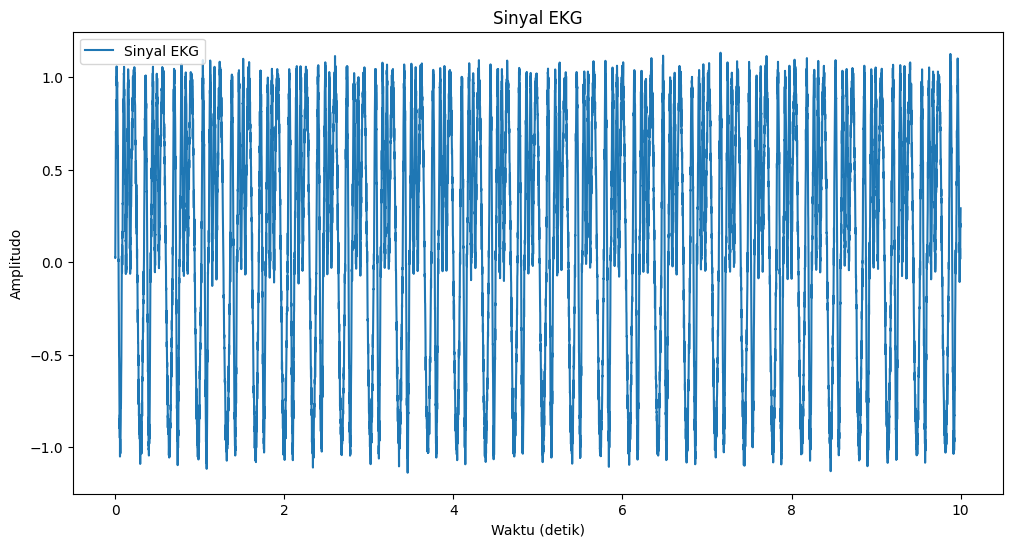

In [6]:
# Membaca data EKG dari file CSV menggunakan pandas
file_path = '/content/ekg_data_normal.csv'
time, amplitude = read_ecg_csv(file_path)

# Menampilkan plot EKG
plot_ecg_data(time, amplitude)

In [7]:
def objective_function(params, signal):
    # Mendapatkan parameter yang akan dioptimalkan
    threshold, distance = params

    # Deteksi puncak menggunakan find_peaks
    peaks, _ = find_peaks(signal, height=threshold, distance=distance)

    # Menghitung jumlah puncak
    num_peaks = len(peaks)

    # Mengoptimalkan berdasarkan jumlah puncak (maksimalkan jumlah puncak)
    return -num_peaks

In [8]:
def plot_ecg_with_peaks(signal, peaks, title="Deteksi Puncak EKG"):
    plt.figure(figsize=(12, 6))
    plt.plot(signal, label="Sinyal EKG")
    plt.plot(peaks, signal[peaks], "x", label="Puncak Deteksi")
    plt.title(title)
    plt.xlabel("Waktu (detik)")
    plt.ylabel("Amplitudo")
    plt.legend()
    plt.show()

In [9]:
# Fungsi untuk mengevaluasi kinerja deteksi puncak
def evaluate_detection(signal, optimized_params):
    threshold, distance = optimized_params
    detected_peaks, _ = find_peaks(signal, height=threshold, distance=distance)

    # Misalkan Anda memiliki posisi puncak sebenarnya dengan nilai float
    true_peak_positions_float = [0.8, 0.9, 1.0, 1.1]

    # Bulatkan atau konversi ke indeks yang sesuai
    true_peak_positions = np.round(true_peak_positions_float).astype(int)

    # Buat array binary (0: tidak ada puncak, 1: ada puncak) berdasarkan posisi indeks sebenarnya
    ground_truth = np.zeros_like(signal)
    ground_truth[true_peak_positions] = 1

    # Hitung matriks kebingungan (confusion matrix)
    cm = confusion_matrix(ground_truth, np.in1d(np.arange(len(signal)), detected_peaks))

    # Tampilkan hasil evaluasi
    print(f"Confusion Matrix: {cm}")

    # Tampilkan plot sinyal EKG dengan puncak yang dideteksi
    plot_ecg_with_peaks(signal, detected_peaks, "Deteksi Puncak EKG")

In [10]:
# Fungsi utama untuk menjalankan optimisasi dan evaluasi
def run_optimization_and_evaluation(file_path):
    time, ecg_signal = read_ecg_csv(file_path)

    # Jalankan optimisasi untuk mendapatkan parameter terbaik
    best_params, _ = pso(objective_function, lb=[0.1, 1], ub=[1, 50], args=(ecg_signal,))

    # Evaluasi deteksi puncak dengan parameter terbaik
    evaluate_detection(ecg_signal, best_params)

Stopping search: maximum iterations reached --> 100
Confusion Matrix: [[8427 1572]
 [   1    0]]


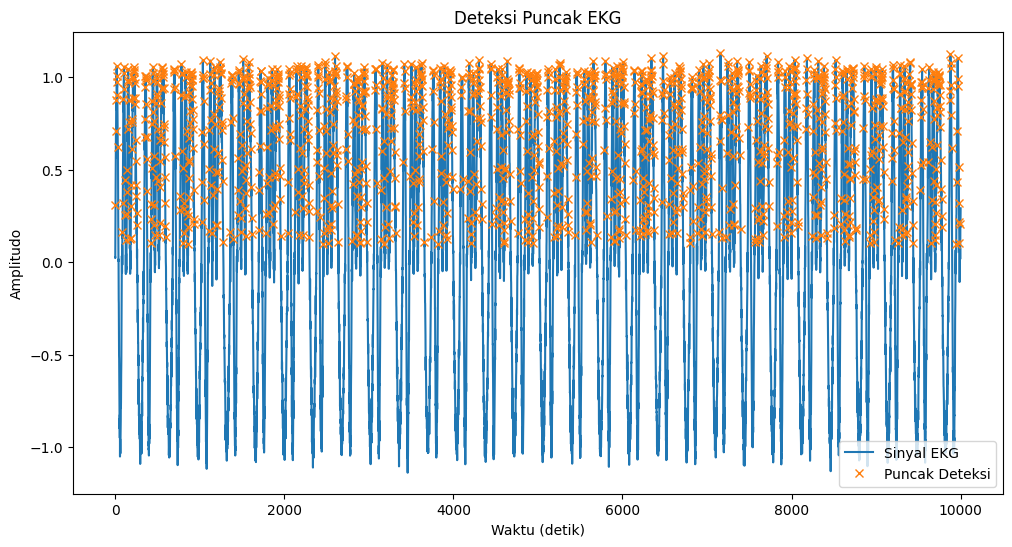

In [11]:
if __name__ == "__main__":
    # Masukkan data
    file_path = '/content/ekg_data_normal.csv'

    # Jalankan optimisasi dan evaluasi
    run_optimization_and_evaluation(file_path)